<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data pre-processing</a></span><ul class="toc-item"><li><span><a href="#Result" data-toc-modified-id="Result-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Result</a></span></li></ul></li><li><span><a href="#Study-on-the-problem" data-toc-modified-id="Study-on-the-problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Study on the problem</a></span><ul class="toc-item"><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Random forest</a></span></li><li><span><a href="#Result" data-toc-modified-id="Result-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Result</a></span></li></ul></li><li><span><a href="#Imbalance-dealing" data-toc-modified-id="Imbalance-dealing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imbalance dealing</a></span><ul class="toc-item"><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Random forest</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Model-testing" data-toc-modified-id="Model-testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model testing</a></span></li><li><span><a href="#General-conclusion" data-toc-modified-id="General-conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>General conclusion</a></span></li></ul></div>

# Clients churn

Customers began to leave Beta-Bank every month a little, but noticeable. Banking marketers figured it was cheaper to keep current customers than to attract new ones.

It is necessary to predict whether the client will leave the bank in the near future or not. You are provided with historical data on customer behavior and termination of agreements with the bank.

Build a model with an extremely large *F1*-measure. To pass the project successfully, you need to bring the metric to 0.59. Check the *F1*-measure on the test set yourself.

Additionally measure *AUC-ROC*, compare its value with *F1*-measure.

Data source: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Data pre-processing

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, r2_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.utils import shuffle

import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Churn.csv') 
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
data.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            9091 non-null   float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
#deleting unvaluable columns and the rows with tenure=NaN
data = data.drop(['surname', 'row_number', 'customer_id'], axis=1)
data = data.dropna(subset=['tenure'])

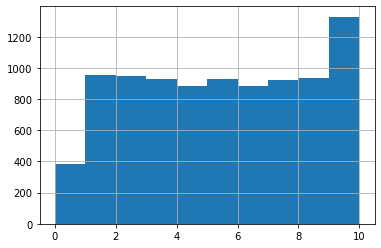

In [8]:
data.tenure.hist()

In [9]:
#check full duplicates
data.duplicated().sum()

0

In [10]:
data = pd.get_dummies(data, drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       9091 non-null   int64  
 1   age                9091 non-null   int64  
 2   tenure             9091 non-null   float64
 3   balance            9091 non-null   float64
 4   num_of_products    9091 non-null   int64  
 5   has_cr_card        9091 non-null   int64  
 6   is_active_member   9091 non-null   int64  
 7   estimated_salary   9091 non-null   float64
 8   exited             9091 non-null   int64  
 9   geography_Germany  9091 non-null   uint8  
 10  geography_Spain    9091 non-null   uint8  
 11  gender_Male        9091 non-null   uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 736.9 KB


### Result
The data was checked. No duplicates found. Brought the names of the signs to a convenient format.

Gaps were found in the tenure column, these lines were deleted.

The categorical features *sex* and *geography* were converted into quantitative features using one-hot encoding, while the original column was removed (to avoid the dummy trap). The categorical attribute *surname* was preliminary removed from the dataset.


## Study on the problem

In [11]:
# split the dataset into training, validation and test

features = data.drop(['exited'], axis=1)
target = data['exited']

X, X_test, y, y_test = train_test_split(features, target, test_size=.2, random_state=25)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.25, random_state=25)

for i in [X_train, y_train, X_valid, y_valid, X_test, y_test]:
    print(i.shape)

(5454, 11)
(5454,)
(1818, 11)
(1818,)
(1819, 11)
(1819,)


Let's look at class balance

In [12]:
target.value_counts(normalize=True)

0    0.796062
1    0.203938
Name: exited, dtype: float64

<b>Conclusion: </b> 20% of clients leave, classes are unbalanced. Nevertheless, let's try to train models without balancing.

In [13]:
# function to automate validation, returns F1 and ROC-AUC on validation set
def check(Model, features_train, target_train):
    model = Model 
    model.fit(features_train, target_train) 
    predictions = model.predict(X_valid) 
    return f1_score(y_valid, predictions), roc_auc_score(y_valid, predictions)

### Logistic regression

In [14]:
model = LogisticRegression(random_state=25, solver='liblinear')
result = check(model, X_train, y_train)
print(f"F1:{result[0]}, ROC-AUC:{result[1]}")

F1:0.1, ROC-AUC:0.517324224968883


In [15]:
check(model, X_train, y_train)

(0.1, 0.517324224968883)

<b>Conclusion: </b> The F1-metric for logistic regression is 0, which is due to the fact that precision or recall are 0. This is exactly what one would expect if the predictions are 0. ROC-AUC = 0.5 indicates that that the model produces random values.

In [16]:
#looking for max possible value for the predictions
model.fit(X_train, y_train) 
predictions = model.predict_proba(X_valid)[:, 1]
predictions.max()

0.6943891523758886

### Random forest

Accuracy of the best model on the validation sample: 0.565
No. of trees: 61, depth: 13


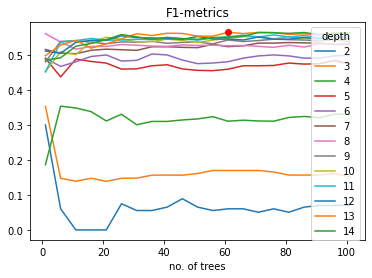

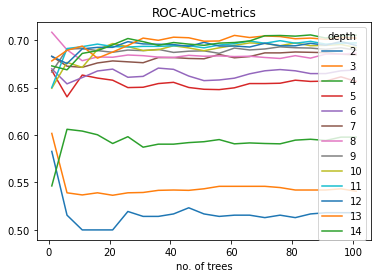

In [17]:
best_model = None
best_result = 0
best_est, best_depth = 0,0
estimators = list(range(1, 102, 5))
new = pd.DataFrame(index=estimators)
new_rocauc = pd.DataFrame(index=estimators)


for depth in range(2, 15):
    results = []
    results_rocauc = []
    for est in estimators: 
        result = check(RandomForestClassifier(random_state=101, n_estimators=est, max_depth=depth),
                       X_train,
                       y_train)
        results.append(result[0])
        results_rocauc.append(result[1])      
        
        if result[0] > best_result:
            best_result = result[0]
            best_est, best_depth = est, depth
            
    new[str(depth)] = results
    new_rocauc[str(depth)] = results_rocauc

print("Accuracy of the best model on the validation sample:", round(best_result,3))
print(f'No. of trees: {best_est}, depth: {best_depth}')

plt.plot(new)    
plt.legend(title='depth', labels=new.columns)
plt.plot(best_est, best_result, 'ro')
plt.title('F1-metrics')
plt.xlabel('no. of trees')
plt.show()

plt.plot(new_rocauc)    
plt.legend(title='depth', labels=new_rocauc.columns)
plt.title('ROC-AUC-metrics')
plt.xlabel('no. of trees')
plt.show()

<b>Conclusion: </b> The random forest model on the original data gives the best value for the F1-metric of 0.554 for 86 trees with a depth of 14. ROC-AUC is approximately 0.7.

### Result
The value of F1 for logistic regression is 0. The model does not work because the classes are not balanced.

The random forest model on the original data gives the best value for the F1-metric of 0.554 for 86 trees with a depth of 14. ROC-AUC is approximately 0.7.

## Imbalance dealing
### Logistic regression

Let's try to apply different ways to deal with imbalance.

The built-in way of the LogisticRegression method:

In [18]:
model = LogisticRegression(random_state=25, solver='liblinear', class_weight='balanced')
result = check(model, X_train, y_train)
print(f"F1:{result[0]:.3f}, ROC-AUC:{result[1]:.3f}")

F1:0.501, ROC-AUC:0.704


Increasing the size of the class "1":

In [19]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=25)
    
    return features_upsampled, target_upsampled 

In [20]:
for n in range(1,10):
    features_upsampled, target_upsampled = upsample(X_train, y_train, n)

    model = LogisticRegression(random_state=25, solver='liblinear')
    result = check(model, features_upsampled, target_upsampled)    
    print(f"1:{n} F1:{result[0]:.3f} ROC-AUC:{result[1]:.3f}")   

1:1 F1:0.100 ROC-AUC:0.517
1:2 F1:0.339 ROC-AUC:0.590
1:3 F1:0.439 ROC-AUC:0.646
1:4 F1:0.446 ROC-AUC:0.655
1:5 F1:0.436 ROC-AUC:0.647
1:6 F1:0.418 ROC-AUC:0.627
1:7 F1:0.402 ROC-AUC:0.603
1:8 F1:0.391 ROC-AUC:0.586
1:9 F1:0.384 ROC-AUC:0.573


<b>Conclusion: </b> By bringing the ratio of class sizes to 1:1, it is possible to increase the value of the F1 metric to 0.49. As expected, this is achieved by increasing the size of the class "1" by 4 times, or decreasing the size of class "0" by 4 times. With a further change in the ratio of class sizes, the model becomes again random.

For the random forest model, let's take, for example, upsampled classes.

### Random forest

Accuracy of the best model on the validation sample: 0.634
No. of trees: 66, depth: 14


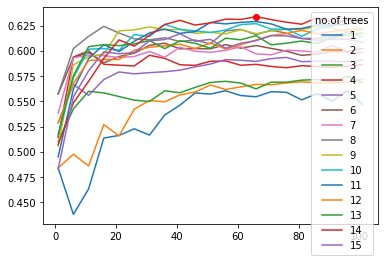

In [21]:
best_result = 0
best_est, best_depth = 0,0
estimators = list(range(1, 102, 5))
new = pd.DataFrame(index=estimators)

features_upsampled, target_upsampled = upsample(X_train, y_train, 4)


for depth in range(1, 16):
    results = []
    for est in estimators:
        result = check(RandomForestClassifier(random_state=25, n_estimators=est, max_depth=depth),
                    features_upsampled,
                    target_upsampled)
        results.append(result[0])      
        
        if result[0] > best_result:
            best_result = result[0]
            best_est, best_depth = est, depth
            
    new[str(depth)] = results
    
plt.plot(new)    
plt.legend(title='no.of trees', labels=new.columns)
plt.plot(best_est, best_result, 'ro')

print("Accuracy of the best model on the validation sample:", round(best_result,3))
print(f'No. of trees: {best_est}, depth: {best_depth}')

### Conclusion
If class imbalance is taken into account (original class sizes are related as 4:1), it is possible to improve the quality of model training. For Logistic Regression, the value of the F1 metric reaches 0.49. For a random forest, we tested models with up to 100 trees and a depth of up to 15. The best value of the metric F1 = 0.642 can be achieved for a model with 21 trees and a depth of 12.

## Model testing

In [39]:
model = RandomForestClassifier(random_state=25, n_estimators=21, max_depth=12)
model.fit(features_upsampled, target_upsampled)
predictions = model.predict(X_test)
print("F1:", round(f1_score(y_test, predictions), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, predictions), 3))

F1: 0.59
ROC-AUC: 0.738


## General conclusion
The proposed dataset with information from Beta-Bank was analyzed. The sample is divided into training, validation and test in the ratio 3:1:1.

We checked the quality of binary classification models (random forest, logistic regression) using the F1 and AUC-ROC metrics, first on the original classes (ratio "0":"1" = 4:1), then on the balanced ones. For the random forest model, the number of trees was varied from 1 to 100, and the depth was varied from 1 to 15.

On imbalanced classes, logistic regression does not work (predictions are random), the best value of the F1 metric for a random forest model is 0.554.

When taking into account the class imbalance, the best value of the F1-metric for the logistic regression model is 0.496, for the random forest model it is 0.642 (21 trees with a depth of 12).

On the test data, we tested the model that showed the best quality on the validation set. F1 metric = 0.607 and ROC-AUC is 0.751.